## Machine Learning Competition Notebook

## Student Names (use Alphabetical Order): 


#### Dharaneesh Venkatesh, 19018304 , Software Engineering, 100%
#### Jansirani Subburam, 19166125, Software Engineering, 100%
#### Kailash Muralidharan, 19116608, Software Engineering, 100%
#### Kaustab Basu, 19005946, Software Engineering, 100%
#### Priyasha Prasad, 19110472, Business Analytics, 100%

### Summary

#### Data Loading and Visualization
* The 'train.csv' is loaded into a pandas dataframe.
* Using the head and describe functions, we get an overview of the data that is present.
* We manually check in the csv file if any record has data missing for a column.
* Seaborn category plot is used to visualize the relation between each independent feature vs Category.
* It is observed that 'id' field has a distinct partition while other features are scattered without a definite pattern.
* Matplotlib histogram plot is used to get an idea about the distribution of the 2 output categories.

#### Data Pre processing

* As the range of data varies and there are multiple outliers in each of the feature, we test out 3 data scaling options with RandomScaler, MinMaxScaler and StandardScaler and observe the effects on a baseline logitic regression model.
* We conclude that StandardScaler fits best for this dataset.
* We then use the ExtraTreeClassfier from the ensemble package to assign a score of importance to each of the features.
* It is again observed that the id field has an importance close to 70 while other fields have comparitively less importance.
* Then, we decided to adopt a comparative approach where we create two train and test dataset pairs which are with and without the id field.
* We verify the impact of principal component analysis (for dimensionality reduction before classification) after we understand the baseline predictions of some of our models and shortlist the best ones.


#### Model training and testing
* We undergo 2 iterations for with id and  without id datasets
* For each iteraton we,
    * Split the training set into 80:20 ratio for training and testing.
    * Use the following models:
        * Majority Class Classifier (Baseline)
        * Logistic Regression
        * Gaussian Naive Bayes
        * Linear and Quadratic Discriminant Analysis
        * Support Vector Classifiers with Linear, Polynomial and RBF kernels
        * Neural Network (1 Layer and 3 Layer)
        * Ensemble Classifiers - AdaBoost and RandomForest
        * Stochastic Gradient Descent
        * k Nearest Neighbours
        * Multinomial Naive Bayes with discretization
    * Compare the models on:
        * Accuracy
        * False Positive
        * False Negative
        * AUC 
* We choose RandomForest and Logistic Regression to use PCA and observe the effects of varying the feature threshold on accuracy, False positive and False negative. A comparison of results with and without PCA is done.

#### Shortlisting of models for final prediction and actual prediction
* We shortlist 2 models based on the performance metrics for with and without id.
* We use the full train.csv dataset for fitting the models.
* The test.csv is also scaled using Standardscaler.
* For each of the selected models, separate prediction files are generated.

#### Kaggle submissions and observation
* Individual prediction files were uploaded on the kaggle platform for scoring.
* Apart from the 4 selected models in this notebook, 30+ submissions were made on the platform from this team covering almost all the models and individual variances.
* Models trained on dataset without the id gave a Kaggle score in the range of 80 - 83.
* Models trained on dataset with the id gave a Kaggle score in the range of 98-100.


#### Conclusion & Learnings
* It was a very good learning experience for the team to do a comparative study of different models with feature selection and model tuning.
* The effect of 'id' feature on the performance was surprising considering the fact that practically it does not hold any value.
* We also learned that accuracy is not the only measure of performance, there are more parameters and the importance of these vary from problem statement to statement.
* Sklearn package has even more interesting models that are suitable for different types of datasets.


In [1]:
import pandas as pd  
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks", color_codes=True)

In [2]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, roc_curve, auc, roc_auc_score

<h1>Data loading</h1>

We load the training data and see the first idea of each column.


In [3]:
#df_train = pd.read_csv("train.csv")
df_train = pd.read_csv("train.csv")
df_train.head(5)

,Id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,Category
0,8255,25.0,4.0,1.0,4.0,82.0,385.44,0.07,15.00,25.70,...,17.0,0.0,3.0,0.0,13.0,13.0,52.0,30.0,7.0,0
1,7507,40.0,12.0,12.0,12.0,146.0,806.44,0.06,17.29,46.63,...,36.0,0.0,2.0,0.0,17.0,29.0,87.0,59.0,23.0,0
2,6758,52.0,2.0,1.0,2.0,227.0,981.08,0.01,86.33,11.36,...,36.0,3.0,10.0,0.0,14.0,6.0,153.0,74.0,3.0,0
3,19,85.0,9.0,1.0,7.0,277.0,1714.58,0.03,32.64,52.53,...,69.0,0.0,14.0,0.0,26.0,47.0,161.0,118.0,13.0,1
4,1299,38.0,4.0,1.0,1.0,210.0,1117.60,0.04,24.23,46.12,...,29.0,0.0,7.0,0.0,14.0,26.0,120.0,90.0,7.0,1


In [4]:
df_train.describe()

,Id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,Category
count,9380.000000,9380.000000,9380.000000,9380.000000,9380.000000,9380.000000,9380.000000,9380.000000,9380.000000,9380.000000,...,9380.000000,9380.000000,9380.000000,9380.000000,9380.000000,9380.000000,9380.000000,9380.000000,9380.000000,9380.000000
mean,5440.890725,42.027090,6.369446,3.374350,4.010810,114.581695,676.963606,0.134403,14.213208,29.376125,...,26.414286,2.701173,4.624094,0.361727,11.250128,16.847889,68.197249,46.500448,11.295991,0.192431
std,3130.218947,78.817378,13.440692,6.594455,9.462479,254.156909,2004.290249,0.159895,18.534503,34.183110,...,61.824732,9.064867,10.080942,1.620112,10.384203,27.601759,154.222730,102.329605,23.005097,0.394231
min,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2727.500000,11.000000,2.000000,1.000000,1.000000,15.000000,50.190000,0.030000,3.110000,12.000000,...,4.000000,0.000000,0.000000,0.000000,5.000000,4.000000,9.000000,6.000000,3.000000,0.000000
50%,5450.500000,23.000000,3.000000,1.000000,2.000000,49.000000,221.650000,0.080000,9.205000,22.030000,...,13.000000,0.000000,2.000000,0.000000,11.000000,11.000000,29.000000,20.000000,5.000000,0.000000
75%,8137.250000,46.000000,7.000000,3.000000,4.000000,119.000000,620.210000,0.160000,19.000000,36.752500,...,28.000000,2.000000,5.000000,0.000000,16.000000,21.000000,71.000000,48.000000,13.000000,0.000000
max,10884.000000,3442.000000,470.000000,165.000000,402.000000,8441.000000,80843.080000,1.300000,408.730000,569.780000,...,2824.000000,344.000000,447.000000,42.000000,411.000000,1026.000000,5420.000000,3021.000000,826.000000,1.000000


<h1> Data Visualization </h1>

We plot each independent feature against the category column to find patterns.

Index(['Id', 'loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e',
       'b', 't', 'lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment',
       'uniq_Op', 'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount',
       'Category'],
      dtype='object')


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:311: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


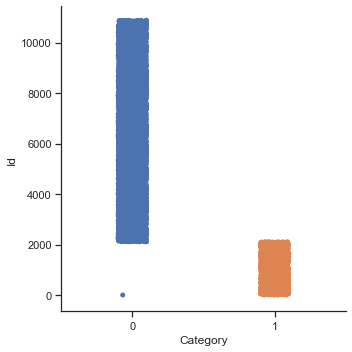

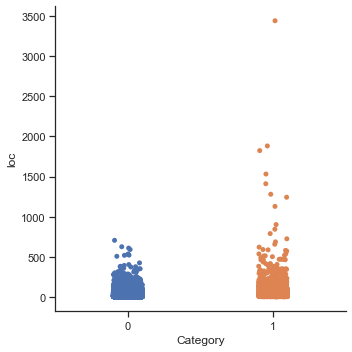

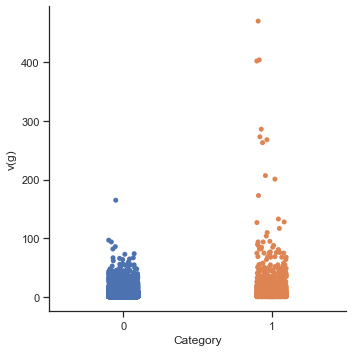

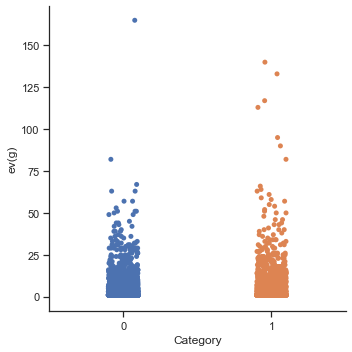

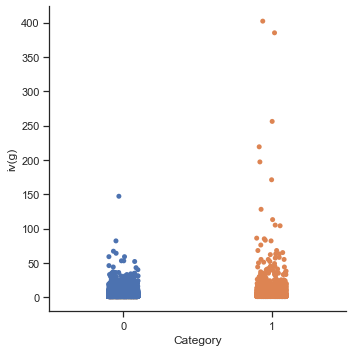

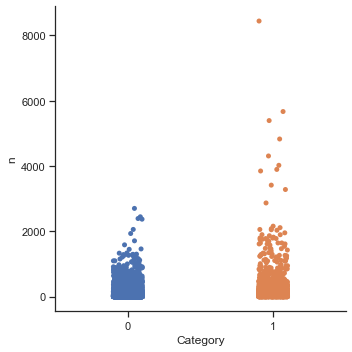

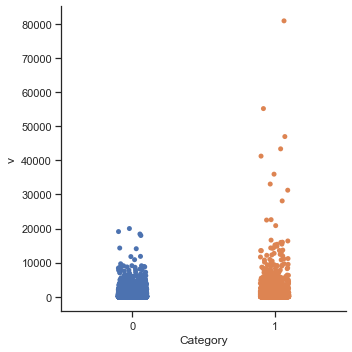

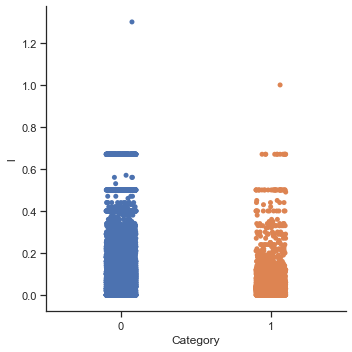

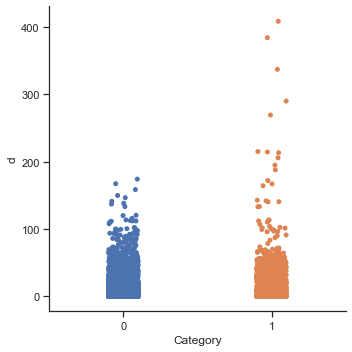

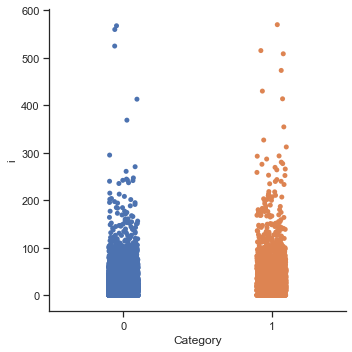

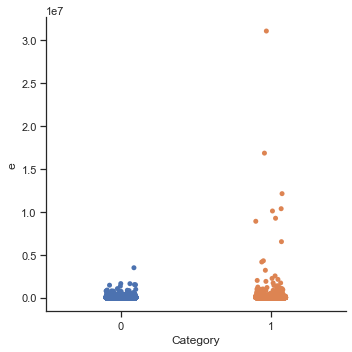

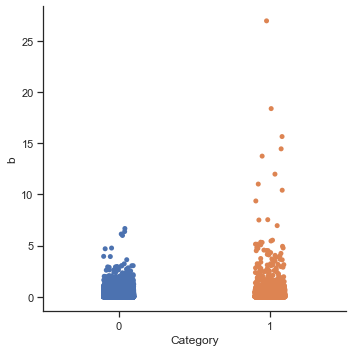

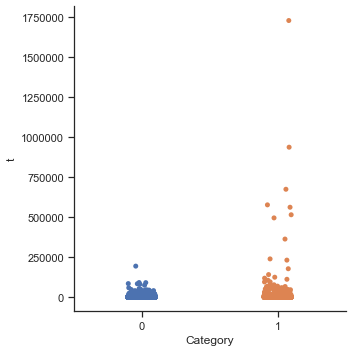

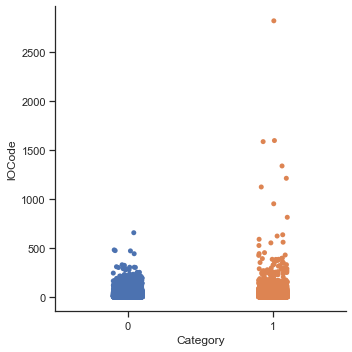

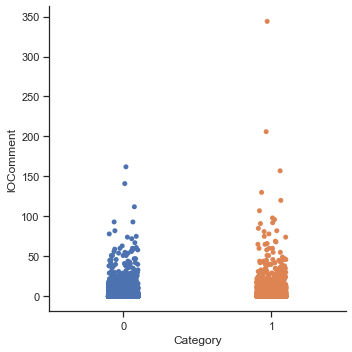

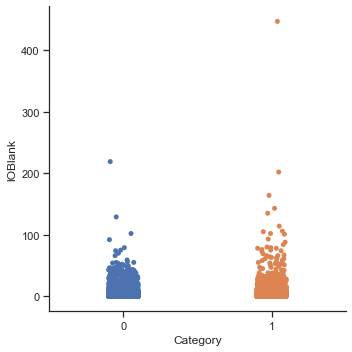

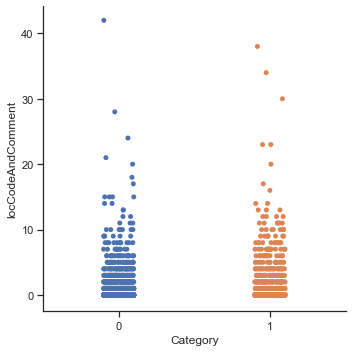

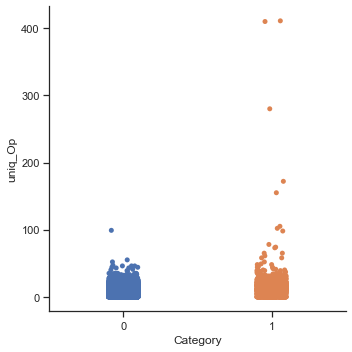

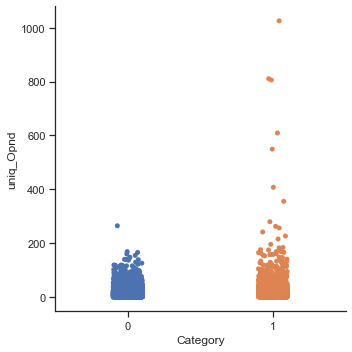

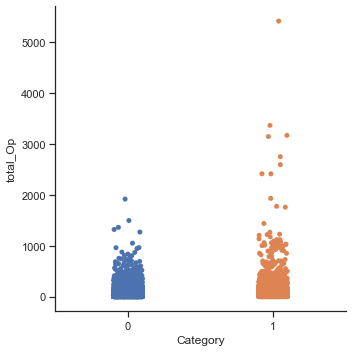

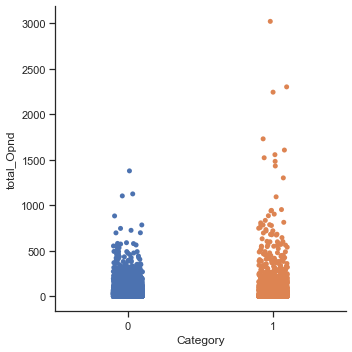

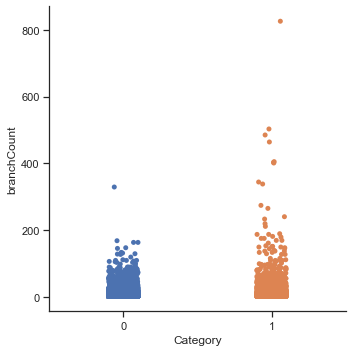

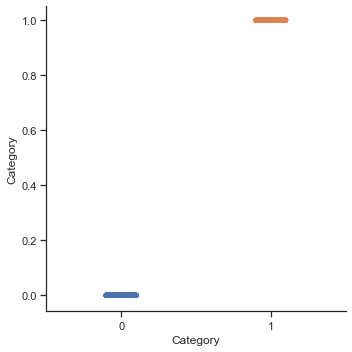

In [5]:
df_col = df_train.columns
print(df_col)
for i in df_col:
    sns.catplot(x='Category',y=i,data=df_train)
# sns.scatterplot(x=df_train['loc'],y=df_train['lOCode'])

In [6]:
X = df_train.iloc[:,0:-1].values
y = df_train.iloc[:,-1].values

(array([7575.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1805.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

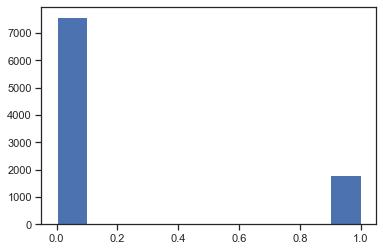

In [7]:
plt.hist(y)

<h1> Data Preprocessing </h1>

We do some data pre-processing for the independent features.

Scaling : We have tried 3 scalers from the sklearn preprocessing package and after testing all 3 of them, it appears that standard scalar works best for this dataset.

In [8]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
# sc = RobustScaler()
sc = StandardScaler()
# sc = MinMaxScaler()
X_scaled = sc.fit_transform(X)

In [9]:
X.shape

(9380, 22)

In [ ]:
# from sklearn.feature_selection import SelectKBest, SelectPercentile,VarianceThreshold, mutual_info_classif, f_classif
# from sklearn.feature_selection import chi2
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.feature_selection import SelectFromModel

# X_feature = f_classif(X,y)
# X_feature.shape

In [ ]:
# from sklearn.feature_selection import VarianceThreshold

# sel = VarianceThreshold(threshold=(.8 * (1 - .8)))

# sel.fit_transform(X)

<h2>Ranking Each Feature</h2>

We use the ExtraTreesClassifier from the ensemble package to find out the importance of each of the 21 independent features.

In [10]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

forest = ExtraTreesClassifier(n_estimators=200)

forest = forest.fit(X,y)

print(forest.feature_importances_)

# model = SelectFromModel(forest, prefit=True, threshold = 0.02)

# X_new = model.transform(X)

# X_new.shape

[0.6806985  0.03080948 0.01730433 0.01541355 0.01871966 0.01530517
 0.0139311  0.01251108 0.01277263 0.0148501  0.0119728  0.01386808
 0.01179658 0.01575072 0.01158809 0.01746932 0.00912644 0.01367228
 0.0157021  0.01406737 0.01385408 0.01881654]


<h3>The importance of the id column is very high, so we create two training datasets : with id and without id</h3>

We see that the importance of the <strong> id feature </strong> is very high compared to the other independent features. So we decide to make 2 training sets -
1. With id as a feature. (X_with_id)
2. Without id as a feature. (X_without_id)

Also we create 2 functions to generate the metrics and the AUC.

In [11]:
X_without_id = df_train.iloc[:,1:-1].values
X_with_id = df_train.iloc[:,0:-1].values

X_without_id_scaled = sc.fit_transform(X_without_id)
X_with_id_scaled = sc.fit_transform(X_with_id)

print(X_with_id.shape)
print(X_without_id.shape)

(9380, 22)
(9380, 21)


In [12]:
scoring = 'accuracy'

In [13]:
#Generic method to print various metrics

def print_metrics(labels, scores):
    metrics = precision_recall_fscore_support(labels, scores)
    conf = confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Predict No Defect    Predict Defect')
    print('Actual No Defect       %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual Defect          %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.3f' % accuracy_score(labels, scores))
    print(' ')
    print('           No Defect       Defect')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.3f' % metrics[0][0] + '        %6.3f' % metrics[0][1])
    print('Recall     %6.3f' % metrics[1][0] + '        %6.3f' % metrics[1][1])
    print('F1         %6.3f' % metrics[2][0] + '        %6.3f' % metrics[2][1])


In [14]:
#Generic function to plot ROC curve

def plot_roc_curve(probabilities,y_test):
    probs = probabilities[:, 1]
    auc = roc_auc_score(y_test, probs)
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    plt.plot(fpr, tpr, color='orange', label = 'AUC = %0.4f' % auc)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

<h1> Model Testing on Training data without id field and 10 fold cross validation and standard scaling</h1>

#### We split the 'train.csv' into 80 : 20 ratio for training, testing and evaluation of our models before we use it on the 'test.csv' dataset to generate the predictions.

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_without_id_scaled, y, test_size=0.20)

<h3>Model 1: DummyClassifier with most_frequent strategy</h3>

* Reason for choosing: We use the majority class classifier as the baseline to compare the remaining models. We want to see what is the probability of any record to be from the majority class.

* Observation: Training gives an approx accuracy of 80% on a 10 fold CV, while testing gives an accuracy of 81%.

In [16]:
from sklearn.dummy import DummyClassifier

classifier = DummyClassifier(strategy="most_frequent")

scores = cross_validate(classifier, X_train, y_train, scoring=scoring, cv=10)

print("Average 10-fold Accuracy: ", scores['test_score'].mean())


Average 10-fold Accuracy:  0.8069030830869626


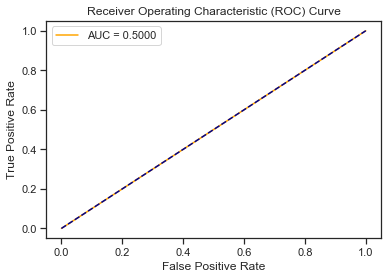

                 Confusion matrix
                 Predict No Defect    Predict Defect
Actual No Defect         1520                 0
Actual Defect             356                 0

Accuracy  0.810
 
           No Defect       Defect
Num case     1520           356
Precision   0.810         0.000
Recall      1.000         0.000
F1          0.895         0.000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [20]:
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)
probabilities = classifier.predict_proba(X_test)
plot_roc_curve(probabilities,y_test)

print_metrics(y_test,y_pred)

<h3>Model 2: Logistic Regression with random state = None</h3>

* Reason for choosing: We use the logistic regression model as it is one of the better linear model classifiers. It works well with continuous inputs. We want to find the function that fits best and vary the value of c to increase and decrease the sharpness/smoothing to better the accuracy.
* Parameters to vary: C, We tried with value of c ranging from 1 - 20 and found the peak accuracy reaches at c = 7
* Observation: Training gives an approx accuracy 1 point greater than base case, while testing gives marginally higher accuracy.

In [21]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=None,C=7,solver='lbfgs')

scores = cross_validate(classifier, X_train, y_train, scoring=scoring, cv=10)

print("Average 10-fold Accuracy: ", scores['test_score'].mean())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

Average 10-fold Accuracy:  0.8134351793218004


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


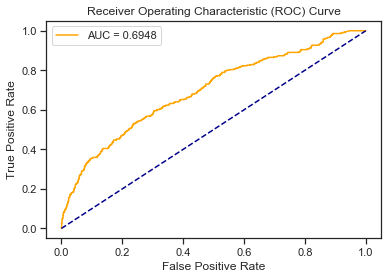

                 Confusion matrix
                 Predict No Defect    Predict Defect
Actual No Defect         1484                36
Actual Defect             306                50

Accuracy  0.818
 
           No Defect       Defect
Num case     1520           356
Precision   0.829         0.581
Recall      0.976         0.140
F1          0.897         0.226


In [22]:
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)
probabilities = classifier.predict_proba(X_test)
plot_roc_curve(probabilities,y_test)

print_metrics(y_test,y_pred)

<h3>Model 3: Gaussian Naive Bayes</h3>

* Reason for choosing: We use the GNB model as it can apply Gaussian Naive Bayes for classification. It works well with continuous inputs.
* Parameters to vary: var_smoothing, We tried with different values and find the default works best.
* Observation: Training gives an approx accuracy marginally greater than base case, while testing gives marginally lower accuracy than base case.

In [23]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()

scores = cross_validate(classifier, X_train, y_train, scoring=scoring, cv=10)

print("Average 10-fold Accuracy: ", scores['test_score'].mean())

Average 10-fold Accuracy:  0.8054335719707947


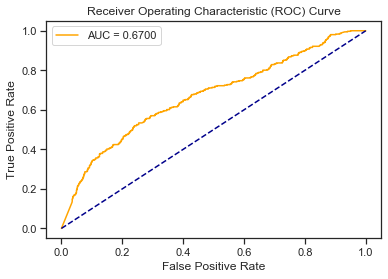

                 Confusion matrix
                 Predict No Defect    Predict Defect
Actual No Defect         1433                87
Actual Defect             275                81

Accuracy  0.807
 
           No Defect       Defect
Num case     1520           356
Precision   0.839         0.482
Recall      0.943         0.228
F1          0.888         0.309


In [24]:
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)
probabilities = classifier.predict_proba(X_test)
plot_roc_curve(probabilities,y_test)

print_metrics(y_test,y_pred)

<h3>Model 4: Linear Discriminant Analysis</h3>

* Reason for choosing: We use the LDA model as it can create a closed-form linear decision surface for classification. It works well with continuous inputs.
* Parameters to vary: There was no noticeable difference in varying solvers and shrinkage parameters.
* Observation: Training gives an approx accuracy 1.2 points greater than base case, while testing gives marginally higher accuracy than base case.

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

classifier = LinearDiscriminantAnalysis()

scores = cross_validate(classifier, X_train, y_train, scoring=scoring, cv=10)

print("Average 10-fold Accuracy: ", scores['test_score'].mean())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Average 10-fold Accuracy:  0.811969043382003


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


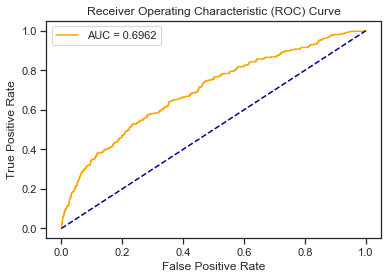

                 Confusion matrix
                 Predict No Defect    Predict Defect
Actual No Defect         1471                49
Actual Defect             297                59

Accuracy  0.816
 
           No Defect       Defect
Num case     1520           356
Precision   0.832         0.546
Recall      0.968         0.166
F1          0.895         0.254


In [26]:
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)
probabilities = classifier.predict_proba(X_test)
plot_roc_curve(probabilities,y_test)

print_metrics(y_test,y_pred)

<h3>Model 5: Quadratic Discriminant Analysis</h3>

* Reason for choosing: We use the QDA model as it can create a closed-form quadratic decision surface for classification. It works well with continuous inputs.
* Parameters to vary: None applicable.
* Observation: Training gives an approx accuracy 1.2 points greater than base case, while testing gives marginally higher accuracy than base case.

In [27]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifier = QuadraticDiscriminantAnalysis()

scores = cross_validate(classifier, X_train, y_train, scoring=scoring, cv=10)

print("Average 10-fold Accuracy: ", scores['test_score'].mean())

Average 10-fold Accuracy:  0.8006387216095792


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\ProgramData\Anaconda3\lib\site-

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


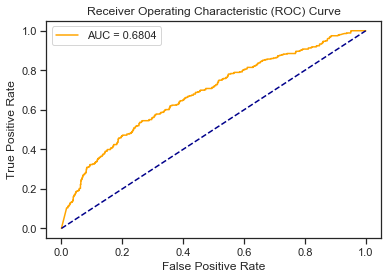

                 Confusion matrix
                 Predict No Defect    Predict Defect
Actual No Defect         1423                97
Actual Defect             274                82

Accuracy  0.802
 
           No Defect       Defect
Num case     1520           356
Precision   0.839         0.458
Recall      0.936         0.230
F1          0.885         0.307


In [28]:
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)
probabilities = classifier.predict_proba(X_test)
plot_roc_curve(probabilities,y_test)

print_metrics(y_test,y_pred)

<h3>Model 6: Support Vector Classifier with linear kernel</h3>

* Reason for choosing: We use the SVC as it is a type of discriminative classifier which works on decision fucntion. It works well with continuous inputs and higher dimension in the dataset.
* Parameters to vary: None used.
* Observation: Training gives an approx accuracy 1.1 points greater than base case, while testing gives marginally higher accuracy than base case.

In [49]:
from sklearn import svm
classifier = svm.SVC(kernel='linear')

scores = cross_validate(classifier, X_train, y_train, scoring=scoring, cv=10)

print("Average 10-fold Accuracy: ", scores['test_score'].mean())


Average 10-fold Accuracy:  0.8111676206831774


In [48]:
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

print_metrics(y_test,y_pred)

                 Confusion matrix
                 Predict No Defect    Predict Defect
Actual No Defect         1516                 4
Actual Defect             348                 8

Accuracy  0.812
 
           No Defect       Defect
Num case     1520           356
Precision   0.813         0.667
Recall      0.997         0.022
F1          0.896         0.043


<h3>Model 7: Support Vector Classifier with polynomial kernel</h3>

* Reason for choosing: We use the SVC as it is a type of discriminative classifier which works on decision fucntion. It works well with continuous inputs and higher dimension in the dataset.
* Parameters to vary: None used.
* Observation: Training gives an approx accuracy 1.2 points greater than base case, while testing gives marginally higher accuracy than base case.

In [50]:
classifier = svm.SVC(kernel='poly',degree=3, gamma='auto')

scores = cross_validate(classifier, X_train, y_train, scoring=scoring, cv=10)

print("Average 10-fold Accuracy: ", scores['test_score'].mean())

Average 10-fold Accuracy:  0.8128998892442476


In [51]:
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

print_metrics(y_test,y_pred)

                 Confusion matrix
                 Predict No Defect    Predict Defect
Actual No Defect         1503                17
Actual Defect             331                25

Accuracy  0.814
 
           No Defect       Defect
Num case     1520           356
Precision   0.820         0.595
Recall      0.989         0.070
F1          0.896         0.126


<h3>Model 8: Support Vector Classifier with rbf kernel</h3>

* Reason for choosing: We use the SVC as it is a type of discriminative classifier which works on decision function. It works well with continuous inputs and higher dimension in the dataset.
* Parameters to vary: None used.
* Observation: Training gives an approx accuracy 1.38 points greater than base case, while testing gives marginally higher accuracy than base case.

In [52]:
classifier = svm.SVC(kernel='rbf', gamma='auto')

scores = cross_validate(classifier, X_train, y_train, scoring=scoring, cv=10)

print("Average 10-fold Accuracy: ", scores['test_score'].mean())

Average 10-fold Accuracy:  0.8138325114652055


In [54]:
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

print_metrics(y_test,y_pred)

                 Confusion matrix
                 Predict No Defect    Predict Defect
Actual No Defect         1496                24
Actual Defect             303                53

Accuracy  0.826
 
           No Defect       Defect
Num case     1520           356
Precision   0.832         0.688
Recall      0.984         0.149
F1          0.901         0.245


<h3>Model 9: Neural Network with 1 layer</h3>

* Reason for choosing: We use the MLPC model as it implements a multi-layer perceptron (MLP) algorithm that trains using Backpropagation. It works well with continuous inputs and higher dimension is the dataset. In this case we have 1 layer.
* Parameters to vary: We varied the activation between logistic, tanh and relu. Logistic gives better accuracy for this case.
* Observation: Training gives an approx accuracy 1 points greater than base case, while testing gives marginally higher accuracy than base case.

In [29]:
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier(hidden_layer_sizes=(5,), max_iter=3000,activation="logistic",solver="lbfgs")

scores = cross_validate(classifier, X_train, y_train, scoring=scoring, cv=10)

print("Average 10-fold Accuracy: ", scores['test_score'].mean())

Average 10-fold Accuracy:  0.8105016641807363


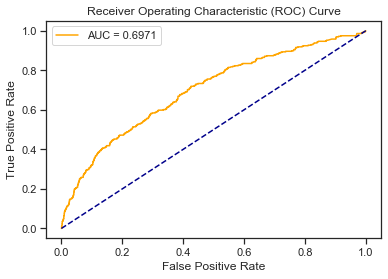

                 Confusion matrix
                 Predict No Defect    Predict Defect
Actual No Defect         1448                72
Actual Defect             283                73

Accuracy  0.811
 
           No Defect       Defect
Num case     1520           356
Precision   0.837         0.503
Recall      0.953         0.205
F1          0.891         0.291


In [30]:
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)
probabilities = classifier.predict_proba(X_test)
plot_roc_curve(probabilities,y_test)

print_metrics(y_test,y_pred)

<h3>Model 10: Deep Neural network with layers of 10, 7 and 5 nodes</h3>

* Reason for choosing: We use the MLPC as it implements a multi-layer perceptron (MLP) algorithm that trains using Backpropagation. It works well with continuous inputs and higher dimension is the dataset. In this case we have 3 layers with 10,7 and 5 nodes.
* Parameters to vary: We varied the activation between logistic, tanh and relu. Logistic gives better accuracy for this case.
* Observation: Training gives an approx accuracy marginally lower than base case, while testing also gives marginally lower accuracy than base case.

In [44]:
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier(hidden_layer_sizes=(10,7,5), max_iter=3000,activation="logistic",solver="lbfgs")

scores = cross_validate(classifier, X_train, y_train, scoring=scoring, cv=10)

print("Average 10-fold Accuracy: ", scores['test_score'].mean())

Average 10-fold Accuracy:  0.7994392542327482


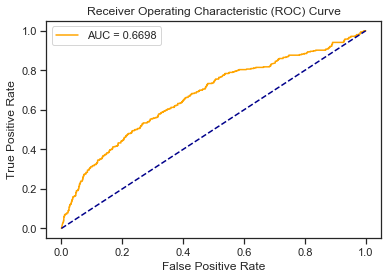

                 Confusion matrix
                 Predict No Defect    Predict Defect
Actual No Defect         1445                75
Actual Defect             290                66

Accuracy  0.805
 
           No Defect       Defect
Num case     1520           356
Precision   0.833         0.468
Recall      0.951         0.185
F1          0.888         0.266


In [45]:
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)
probabilities = classifier.predict_proba(X_test)
plot_roc_curve(probabilities,y_test)

print_metrics(y_test,y_pred)

<h3>Model 11: AdaBoost ensemble classifier using 100 estimators</h3>

* Reason for choosing: We use the AdaBoost model as it implements a Boosting method using DecisionTree as base estimator and modifies the weights repeatedly until the best fit is reached. It works well with continuous inputs and higher dimension is the dataset. In this case we have 100 max estimators.
* Parameters to vary: We use the DecisionTree default base classifier and 100 as max number of estimators.
* Observation: Training gives an approx accuracy 1.3 points greater than base case, while testing gives 1.0 points higher accuracy than base case.

In [31]:
from sklearn.ensemble import AdaBoostClassifier

classifier = AdaBoostClassifier(n_estimators=100)

scores = cross_validate(classifier, X_train, y_train, scoring=scoring, cv=10)

print("Average 10-fold Accuracy: ", scores['test_score'].mean())

Average 10-fold Accuracy:  0.8136981128855341


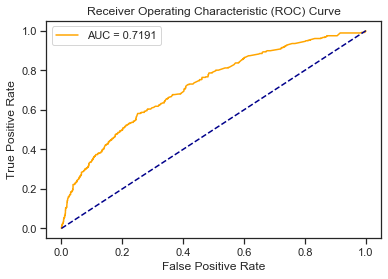

                 Confusion matrix
                 Predict No Defect    Predict Defect
Actual No Defect         1474                46
Actual Defect             292                64

Accuracy  0.820
 
           No Defect       Defect
Num case     1520           356
Precision   0.835         0.582
Recall      0.970         0.180
F1          0.897         0.275


In [32]:
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)
probabilities = classifier.predict_proba(X_test)
plot_roc_curve(probabilities,y_test)

print_metrics(y_test,y_pred)

<h3>Model 12: RandomForest ensemble classifier using 100 estimators/trees</h3>

* Reason for choosing: We use the RandomForest model as it implements an Averaging method using DecisionTree as base estimator and averages the weights repeatedly until the best fit is reached. It works well with continuous inputs and higher dimension is the dataset. In this case we have 100 max estimators.
* Parameters to vary: We use the DecisionTree default base classifier and 100 as max number of estimators.
* Observation: Training gives an approx accuracy 1.3 points greater than base case, while testing gives 2.3 points higher accuracy than base case.

In [33]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=100)

scores = cross_validate(classifier, X_train, y_train, scoring=scoring, cv=10)

print("Average 10-fold Accuracy: ", scores['test_score'].mean())

Average 10-fold Accuracy:  0.8138298450308357


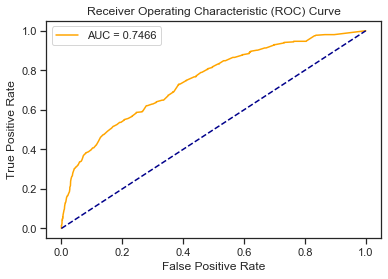

                 Confusion matrix
                 Predict No Defect    Predict Defect
Actual No Defect         1457                63
Actual Defect             249               107

Accuracy  0.834
 
           No Defect       Defect
Num case     1520           356
Precision   0.854         0.629
Recall      0.959         0.301
F1          0.903         0.407


In [34]:
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)
probabilities = classifier.predict_proba(X_test)
plot_roc_curve(probabilities,y_test)

print_metrics(y_test,y_pred)

<h3>Model 13: Stochastic Gradient Descent classifier using hinge loss function and 12 penalty</h3>

* Reason for choosing: We use the SGD model as it implements a discriminative learning of linear classifiers under a loss function. 
* Parameters to vary: We use the default loss and penalty values.
* Observation: Training gives an approx accuracy 3.7 points lower than base case, while testing gives 6.4 points lower accuracy than base case.

In [41]:
from sklearn.linear_model import SGDClassifier

classifier = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)

scores = cross_validate(classifier, X_train, y_train, scoring=scoring, cv=10)

print("Average 10-fold Accuracy: ", scores['test_score'].mean())

Average 10-fold Accuracy:  0.7633187048036234


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\s

In [43]:
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

print_metrics(y_test,y_pred)

                 Confusion matrix
                 Predict No Defect    Predict Defect
Actual No Defect         1231               289
Actual Defect             206               150

Accuracy  0.736
 
           No Defect       Defect
Num case     1520           356
Precision   0.857         0.342
Recall      0.810         0.421
F1          0.833         0.377


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


<h3>Model 14: k Nearest Neighbour</h3>

* Reason for choosing: We use the kNNC model as it implements a simple majority voting based model from the neighbours of a single point.
* Parameters to vary: We use the 5 default neighbours.
* Observation: Training gives an approx accuracy marginally greater than base case, while testing gives 1.0 points lower accuracy than base case.

In [37]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5)

scores = cross_validate(classifier, X_train, y_train, scoring=scoring, cv=10)

print("Average 10-fold Accuracy: ", scores['test_score'].mean())

Average 10-fold Accuracy:  0.8009027161529769


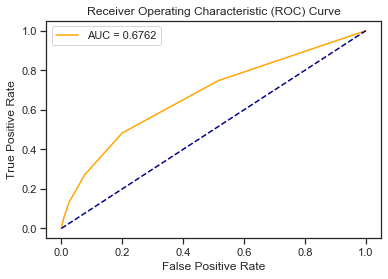

                 Confusion matrix
                 Predict No Defect    Predict Defect
Actual No Defect         1403               117
Actual Defect             259                97

Accuracy  0.800
 
           No Defect       Defect
Num case     1520           356
Precision   0.844         0.453
Recall      0.923         0.272
F1          0.882         0.340


In [38]:
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)
probabilities = classifier.predict_proba(X_test)
plot_roc_curve(probabilities,y_test)

print_metrics(y_test,y_pred)

<h3>Model 15: Multinomial Naive Bayes</h3>

In order to apply Multinomial Naive Bayes, we need to discretize the inputs.
So, we import KBinsDiscretizer, from sklearn.preprocessing.

We iterate over the range (4,20) to find an ideal bin_count that yields maximum Average 10-fold cross-validation accuracy.

For this dataset, n_bins=8 yields the maximum Average 10-fold cross-validation accuracy.
Hence, we set n_bins=8 for KBinsDiscretizer.


For smoothing parameter 'alpha', We tried with different values and find the default (alpha = 1.0) works best.

In [39]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.naive_bayes import MultinomialNB

est = KBinsDiscretizer(n_bins=8,encode='onehot',strategy='uniform')
est.fit(X_train)
Xd_train = est.transform(X_train)
Xd_test  = est.transform(X_test)

classifier = MultinomialNB() #alpha, default value=1.0

scores = cross_validate(classifier, Xd_train, y_train, scoring=scoring, cv=10)

print("Average 10-fold Accuracy: ", scores['test_score'].mean())

Average 10-fold Accuracy:  0.808899886399798


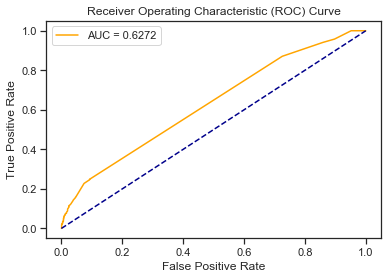

                 Confusion matrix
                 Predict No Defect    Predict Defect
Actual No Defect         1481                39
Actual Defect             315                41

Accuracy  0.811
 
           No Defect       Defect
Num case     1520           356
Precision   0.825         0.512
Recall      0.974         0.115
F1          0.893         0.188


In [40]:
classifier.fit(Xd_train,y_train)

y_pred = classifier.predict(Xd_test)
probabilities = classifier.predict_proba(Xd_test)
plot_roc_curve(probabilities,y_test)

print_metrics(y_test,y_pred)


<h3> Principal Component Analysis </h3>

#### We utilize PCA for reducing the data dimension before classification.
And then for the top 2 models from our ranking based on accuracy (RandomForest and Logistic Regression), we are checking the impact on model performance before and after Principal Component Analysis.

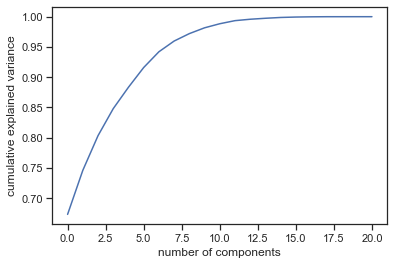

In [55]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Based on above graph, we decide to set n_components=13 for our PCA and then compare the performances before and after PCA.

In [56]:
pca = PCA(n_components=13)
pca.fit(X_train)
X_pca_train = pca.transform(X_train)
X_pca_test = pca.transform(X_test)

print("Training Set")
print("original shape:   ", X_train.shape)
print("transformed shape:", X_pca_train.shape)
print("")
print("Testing Set")
print("original shape:   ", X_test.shape)
print("transformed shape:", X_pca_test.shape)

Training Set
original shape:    (7504, 21)
transformed shape: (7504, 13)

Testing Set
original shape:    (1876, 21)
transformed shape: (1876, 13)


<h4> Effect of PCA on RandomForest Classifier</h4>

In [57]:
from sklearn.ensemble import RandomForestClassifier

randomForest_before_pca = RandomForestClassifier(n_estimators=100)
randomForest_after_pca = RandomForestClassifier(n_estimators=100)

scores_before_pca = cross_validate(randomForest_before_pca, X_train, y_train, scoring=scoring, cv=10)
scores_after_pca = cross_validate(randomForest_after_pca, X_pca_train, y_train, scoring=scoring, cv=10)

print("Average 10-fold Accuracy before PCA: ",scores_before_pca['test_score'].mean())
print("Average 10-fold Accuracy after PCA: ",scores_after_pca['test_score'].mean())

Average 10-fold Accuracy before PCA:  0.8147637128836378
Average 10-fold Accuracy after PCA:  0.8182298502456596


In [58]:
randomForest_before_pca.fit(X_train,y_train)
y_pred_before_pca = randomForest_before_pca.predict(X_test)

print("Before PCA:")
print_metrics(y_test,y_pred_before_pca)

randomForest_after_pca.fit(X_pca_train,y_train)
y_pred_after_pca = randomForest_after_pca.predict(X_pca_test)
probabilities = randomForest_after_pca.predict_proba(X_pca_test)

print("\n")
print("After PCA:")
print_metrics(y_test,y_pred_after_pca)

Before PCA:
                 Confusion matrix
                 Predict No Defect    Predict Defect
Actual No Defect         1459                61
Actual Defect             249               107

Accuracy  0.835
 
           No Defect       Defect
Num case     1520           356
Precision   0.854         0.637
Recall      0.960         0.301
F1          0.904         0.408


After PCA:
                 Confusion matrix
                 Predict No Defect    Predict Defect
Actual No Defect         1446                74
Actual Defect             259                97

Accuracy  0.822
 
           No Defect       Defect
Num case     1520           356
Precision   0.848         0.567
Recall      0.951         0.272
F1          0.897         0.368


<h4> Effect of PCA on Logistic Regression</h4>

In [59]:
from sklearn.linear_model import LogisticRegression

logistic_before_pca = LogisticRegression(random_state=0)
logistic_after_pca = LogisticRegression(random_state=0)

scores_before_pca = cross_validate(logistic_before_pca, X_train, y_train, scoring=scoring, cv=10)
scores_after_pca = cross_validate(logistic_after_pca, X_pca_train, y_train, scoring=scoring, cv=10)

print("Average 10-fold Accuracy before PCA: ",scores_before_pca['test_score'].mean())
print("Average 10-fold Accuracy after PCA: ",scores_after_pca['test_score'].mean())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Average 10-fold Accuracy before PCA:  0.8129018445662421
Average 10-fold Accuracy after PCA:  0.8106360646567076


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [60]:
logistic_before_pca.fit(X_train,y_train)
y_pred_before_pca = logistic_before_pca.predict(X_test)

print("Before PCA:")
print_metrics(y_test,y_pred_before_pca)

logistic_after_pca.fit(X_pca_train,y_train)
y_pred_after_pca = logistic_after_pca.predict(X_pca_test)
probabilities = logistic_after_pca.predict_proba(X_pca_test)

print("\n")
print("After PCA:")
print_metrics(y_test,y_pred_after_pca)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Before PCA:
                 Confusion matrix
                 Predict No Defect    Predict Defect
Actual No Defect         1487                33
Actual Defect             307                49

Accuracy  0.819
 
           No Defect       Defect
Num case     1520           356
Precision   0.829         0.598
Recall      0.978         0.138
F1          0.897         0.224


After PCA:
                 Confusion matrix
                 Predict No Defect    Predict Defect
Actual No Defect         1495                25
Actual Defect             312                44

Accuracy  0.820
 
           No Defect       Defect
Num case     1520           356
Precision   0.827         0.638
Recall      0.984         0.124
F1          0.899         0.207


<h3>Observation on using PCA</h3>

For this dataset, during several attempts in comparing the 2 models before and after PCA, the following observation is made:

While accuracy slightly improves after PCA, the number of instances where there's actually a Defect, but predicted as No Defect (False Positive) is also increasing, which is not desirable from a Software Defects handling perspective.


<h3>How do we keep the False Positives in check?</h3>

First, we need to understand what are False Positives in our problem. 
Here's how we can understand from the Confusion Matrix for our problem:

|-| Predicted No Defect | Predicted Defect|  
|------|------|------|
|**Actual No Defect** | True Positive | False Negative |
|**Actual Defect**| False Positive | True Negative |  
    

Here the four elements in the matrix are defined as:    
**True Positive** or **TP** are cases where the Software has No Defect which have been correctly classified as No Defect.     
**True Negative** or **TN** are cases where the Software has Defect which have been correctly classified as Defect.  
**False Positive** or **FP** are cases where the Software has Defect which have been incorrectly classified as No Defect.   
**False Negative** or **FN** are cases where the Software has No Defect which have been incorrectly classified as Defect.


Hence, our objective is to bring down the False Positive (number of instances where the Software actually has Defect, but was incorrectly predicted as No Defect), at a reasonable compromise with accuracy.

In [61]:
#Generic prediction function to return class "Defect" if probability of that class is more than a particular threshold

def mypredict(probabilities, threshold):
    return np.where(probabilities[:,1]>threshold,1,0)


We plot "False Positive Rate" against "True Positive Rate" and try to identify some threshold in order to classify instances as Software that has Defect.

Text(0, 0.5, 'True Positive Rate')

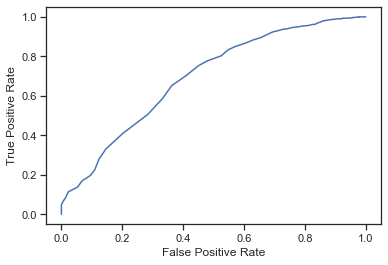

In [62]:
TPR=[]
FPR=[]
for threshold in np.linspace(0,1,100):
    y_pred = mypredict(probabilities, threshold)
    M = confusion_matrix(y_test,y_pred)
    TPR.append(M[0,0]/(M[0,0]+M[0,1]))
    FPR.append(M[1,0]/(M[1,0]+M[1,1]))
    
plt.plot(np.array(FPR),np.array(TPR))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

The plot is quite linear, hence it is not possible to derive an absolute, definite value of threshold and set that for our prediction function.

Let's try 2 different thresholds and understand the impact on accuracy, False Positive and False Negative.

In [63]:
print("At default Threshold:\n")
my_threshold = 0.5
y_test_pred = mypredict(probabilities, my_threshold)

print_metrics(y_test, y_test_pred)

my_threshold = 0.3
y_test_pred = mypredict(probabilities, my_threshold)
print("\nWhen Threshold = 0.3, \n")
print_metrics(y_test, y_test_pred) 

my_threshold = 0.23
y_test_pred = mypredict(probabilities, my_threshold)
print("\nWhen Threshold = 0.23, \n")
print_metrics(y_test, y_test_pred) 

At default Threshold:

                 Confusion matrix
                 Predict No Defect    Predict Defect
Actual No Defect         1495                25
Actual Defect             312                44

Accuracy  0.820
 
           No Defect       Defect
Num case     1520           356
Precision   0.827         0.638
Recall      0.984         0.124
F1          0.899         0.207

When Threshold = 0.3, 

                 Confusion matrix
                 Predict No Defect    Predict Defect
Actual No Defect         1405               115
Actual Defect             248               108

Accuracy  0.807
 
           No Defect       Defect
Num case     1520           356
Precision   0.850         0.484
Recall      0.924         0.303
F1          0.886         0.373

When Threshold = 0.23, 

                 Confusion matrix
                 Predict No Defect    Predict Defect
Actual No Defect         1256               264
Actual Defect             194               162

Accuracy  0.75

At Threshold = 0.3, we find that the False Positive has come down, with minimal impact on accuracy  

However, at Threshold = 0.23, while the False Positive has come down even more, accuracy also drops. 

It is equally important to note that False Negative increases. In our problem, the False Negative may not be as harmful as in the case of Medical Diagnosis, but such an increase is bringing down the accuracy to a significant level  which is definitely not desirable. (e.g) In one of the attempts, there was an accuracy drop from 82% to 73% at this threshold.

Hence, we assert that, by setting the threshold at 0.3 for our prediction function, we can significantly bring down the False Positives with minimal impact on accuracy.

### Conclusion on training the dataset without id field & standard scaling:

Ranking of our top 3 models based on Accuracy on the 20% test data: 
1. RandomForest
2. SVC - rbf
3. AdaBoost

Ranking of our top 3 models based on False Negative on the 20% test data: 
1. SVC - linear
2. SVC - poly
3. SVC - rbf

Ranking of our top 3 models based on False Positive on the 20% test data: 
1. SGD
2. RandomForest
3. kNN

Ranking of our top 3 models based on AUC on the 20% test data: 
1. RandomForest
2. AdaBoost
3. Linear Discriminant Analysis




<h1> Model Testing on Training data with id field and 10 fold cross validation and standard scaling</h1>

#### Note: This section is a direct replication of the previous section with the only addition being the id field in the dataset to observe the impact of the id field on overall metrics.

#### We split the 'train.csv' into 80 : 20 ratio for training, testing and evaluation of our models before we use it on the 'test.csv' dataset to generate the predictions.

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_with_id_scaled, y, test_size=0.20)

<h3>Model 1: DummyClassifier with most_frequent strategy</h3>

In [71]:
from sklearn.dummy import DummyClassifier

classifier = DummyClassifier(strategy="most_frequent")

scores = cross_validate(classifier, X_train, y_train, scoring=scoring, cv=10)

print("Average 10-fold Accuracy: ", scores['test_score'].mean())

Average 10-fold Accuracy:  0.8121001331557924


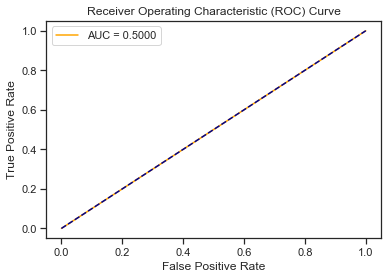

                 Confusion matrix
                 Predict No Defect    Predict Defect
Actual No Defect         1481                 0
Actual Defect             395                 0

Accuracy  0.789
 
           No Defect       Defect
Num case     1481           395
Precision   0.789         0.000
Recall      1.000         0.000
F1          0.882         0.000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [72]:
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)
probabilities = classifier.predict_proba(X_test)
plot_roc_curve(probabilities,y_test)

print_metrics(y_test,y_pred)

<h3>Model 2: Logistic Regression with random state = 0</h3>

In [73]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0)

scores = cross_validate(classifier, X_train, y_train, scoring=scoring, cv=10)

print("Average 10-fold Accuracy: ", scores['test_score'].mean())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Average 10-fold Accuracy:  0.9940030181979583


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


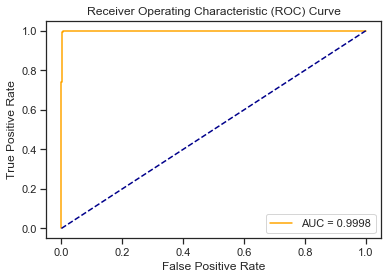

                 Confusion matrix
                 Predict No Defect    Predict Defect
Actual No Defect         1476                 5
Actual Defect               2               393

Accuracy  0.996
 
           No Defect       Defect
Num case     1481           395
Precision   0.999         0.987
Recall      0.997         0.995
F1          0.998         0.991


In [74]:
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)
probabilities = classifier.predict_proba(X_test)
plot_roc_curve(probabilities,y_test)

print_metrics(y_test,y_pred)

<h3>Model 3: Gaussian Naive Bayes</h3>

In [75]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()

scores = cross_validate(classifier, X_train, y_train, scoring=scoring, cv=10)

print("Average 10-fold Accuracy: ", scores['test_score'].mean())

Average 10-fold Accuracy:  0.8290261873058145


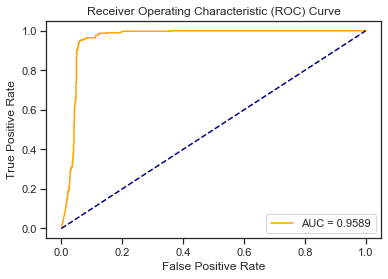

                 Confusion matrix
                 Predict No Defect    Predict Defect
Actual No Defect         1444                37
Actual Defect             319                76

Accuracy  0.810
 
           No Defect       Defect
Num case     1481           395
Precision   0.819         0.673
Recall      0.975         0.192
F1          0.890         0.299


In [76]:
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)
probabilities = classifier.predict_proba(X_test)
plot_roc_curve(probabilities,y_test)

print_metrics(y_test,y_pred)

<h3>Model 4: Linear Discriminant Analysis</h3>

In [77]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

classifier = LinearDiscriminantAnalysis()

scores = cross_validate(classifier, X_train, y_train, scoring=scoring, cv=10)

print("Average 10-fold Accuracy: ", scores['test_score'].mean())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Average 10-fold Accuracy:  0.971081757656458


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


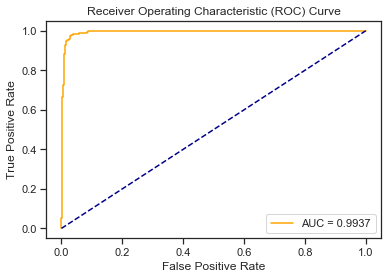

                 Confusion matrix
                 Predict No Defect    Predict Defect
Actual No Defect         1444                37
Actual Defect              17               378

Accuracy  0.971
 
           No Defect       Defect
Num case     1481           395
Precision   0.988         0.911
Recall      0.975         0.957
F1          0.982         0.933


In [78]:
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)
probabilities = classifier.predict_proba(X_test)
plot_roc_curve(probabilities,y_test)

print_metrics(y_test,y_pred)

<h3>Model 5: Quadratic Discriminant Analysis</h3>

In [79]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifier = QuadraticDiscriminantAnalysis()

scores = cross_validate(classifier, X_train, y_train, scoring=scoring, cv=10)

print("Average 10-fold Accuracy: ", scores['test_score'].mean())

Average 10-fold Accuracy:  0.8375541944074566


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\ProgramData\Anaconda3\lib\site-

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


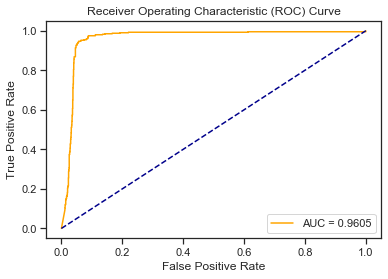

                 Confusion matrix
                 Predict No Defect    Predict Defect
Actual No Defect         1447                34
Actual Defect             303                92

Accuracy  0.820
 
           No Defect       Defect
Num case     1481           395
Precision   0.827         0.730
Recall      0.977         0.233
F1          0.896         0.353


In [80]:
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)
probabilities = classifier.predict_proba(X_test)
plot_roc_curve(probabilities,y_test)

print_metrics(y_test,y_pred)

<h3>Model 6: Support Vector Classifier with linear kernel</h3>

In [81]:
from sklearn import svm
classifier = svm.SVC(kernel='linear')

scores = cross_validate(classifier, X_train, y_train, scoring=scoring, cv=10)

print("Average 10-fold Accuracy: ", scores['test_score'].mean())


Average 10-fold Accuracy:  0.9960019529516202


In [82]:
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

print_metrics(y_test,y_pred)

                 Confusion matrix
                 Predict No Defect    Predict Defect
Actual No Defect         1479                 2
Actual Defect               2               393

Accuracy  0.998
 
           No Defect       Defect
Num case     1481           395
Precision   0.999         0.995
Recall      0.999         0.995
F1          0.999         0.995


<h3>Model 7: Support Vector Classifier with polynomial kernel</h3>

In [83]:
classifier = svm.SVC(kernel='poly',degree=3)

scores = cross_validate(classifier, X_train, y_train, scoring=scoring, cv=10)

print("Average 10-fold Accuracy: ", scores['test_score'].mean())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

Average 10-fold Accuracy:  0.9208427873945849


In [84]:
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

print_metrics(y_test,y_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


                 Confusion matrix
                 Predict No Defect    Predict Defect
Actual No Defect         1478                 3
Actual Defect             147               248

Accuracy  0.920
 
           No Defect       Defect
Num case     1481           395
Precision   0.910         0.988
Recall      0.998         0.628
F1          0.952         0.768


<h3>Model 8: Support Vector Classifier with rbf kernel</h3>

In [85]:
classifier = svm.SVC(kernel='rbf')

scores = cross_validate(classifier, X_train, y_train, scoring=scoring, cv=10)

print("Average 10-fold Accuracy: ", scores['test_score'].mean())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

Average 10-fold Accuracy:  0.9838737683089214


In [86]:
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

print_metrics(y_test,y_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


                 Confusion matrix
                 Predict No Defect    Predict Defect
Actual No Defect         1463                18
Actual Defect               6               389

Accuracy  0.987
 
           No Defect       Defect
Num case     1481           395
Precision   0.996         0.956
Recall      0.988         0.985
F1          0.992         0.970


<h3>Model 9: Neural Network with 1 layer</h3>

In [87]:
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier(hidden_layer_sizes=(5,), max_iter=3000,activation="logistic",solver="lbfgs")

scores = cross_validate(classifier, X_train, y_train, scoring=scoring, cv=10)

print("Average 10-fold Accuracy: ", scores['test_score'].mean())

Average 10-fold Accuracy:  0.9988007101642256


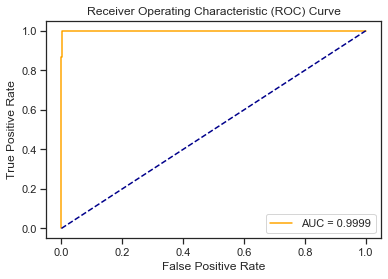

                 Confusion matrix
                 Predict No Defect    Predict Defect
Actual No Defect         1480                 1
Actual Defect               2               393

Accuracy  0.998
 
           No Defect       Defect
Num case     1481           395
Precision   0.999         0.997
Recall      0.999         0.995
F1          0.999         0.996


In [88]:
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)
probabilities = classifier.predict_proba(X_test)
plot_roc_curve(probabilities,y_test)

print_metrics(y_test,y_pred)

<h3>Model 10: Deep Neural network with layers of 15, 10 and 5 nodes</h3>

In [89]:
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier(hidden_layer_sizes=(15,10,5), max_iter=3000,activation="logistic",solver="lbfgs")

scores = cross_validate(classifier, X_train, y_train, scoring=scoring, cv=10)

print("Average 10-fold Accuracy: ", scores['test_score'].mean())

Average 10-fold Accuracy:  0.9977342210386153


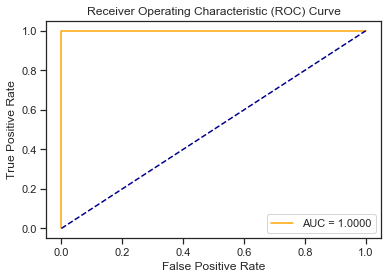

                 Confusion matrix
                 Predict No Defect    Predict Defect
Actual No Defect         1481                 0
Actual Defect               1               394

Accuracy  0.999
 
           No Defect       Defect
Num case     1481           395
Precision   0.999         1.000
Recall      1.000         0.997
F1          1.000         0.999


In [90]:
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)
probabilities = classifier.predict_proba(X_test)
plot_roc_curve(probabilities,y_test)

print_metrics(y_test,y_pred)

<h3>Model 11: AdaBoost ensemble classifier using 100 estimators</h3>

In [91]:
from sklearn.ensemble import AdaBoostClassifier

classifier = AdaBoostClassifier(n_estimators=100)

scores = cross_validate(classifier, X_train, y_train, scoring=scoring, cv=10)

print("Average 10-fold Accuracy: ", scores['test_score'].mean())

Average 10-fold Accuracy:  0.9996001775410563


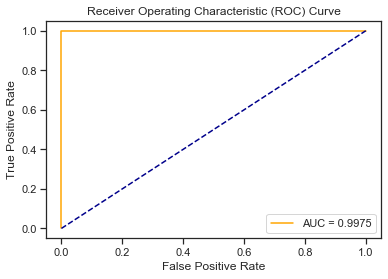

                 Confusion matrix
                 Predict No Defect    Predict Defect
Actual No Defect         1481                 0
Actual Defect               1               394

Accuracy  0.999
 
           No Defect       Defect
Num case     1481           395
Precision   0.999         1.000
Recall      1.000         0.997
F1          1.000         0.999


In [92]:
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)
probabilities = classifier.predict_proba(X_test)
plot_roc_curve(probabilities,y_test)

print_metrics(y_test,y_pred)

<h3>Model 12: RandomForest ensemble classifier using 100 estimators/trees</h3>

In [93]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=100)

scores = cross_validate(classifier, X_train, y_train, scoring=scoring, cv=10)

print("Average 10-fold Accuracy: ", scores['test_score'].mean())

Average 10-fold Accuracy:  0.9994670217487794


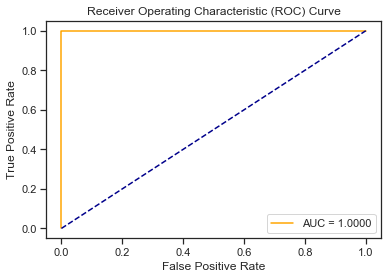

                 Confusion matrix
                 Predict No Defect    Predict Defect
Actual No Defect         1481                 0
Actual Defect               0               395

Accuracy  1.000
 
           No Defect       Defect
Num case     1481           395
Precision   1.000         1.000
Recall      1.000         1.000
F1          1.000         1.000


In [94]:
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)
probabilities = classifier.predict_proba(X_test)
plot_roc_curve(probabilities,y_test)

print_metrics(y_test,y_pred)

<h3>Model 13: Stochastic Gradient Descent classifier using hinge loss function and 12 penalty</h3>

In [95]:
from sklearn.linear_model import SGDClassifier

classifier = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)

scores = cross_validate(classifier, X_train, y_train, scoring=scoring, cv=10)

print("Average 10-fold Accuracy: ", scores['test_score'].mean())

Average 10-fold Accuracy:  0.9868078118064803


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\s

In [97]:
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

print_metrics(y_test,y_pred)

                 Confusion matrix
                 Predict No Defect    Predict Defect
Actual No Defect         1477                 4
Actual Defect               7               388

Accuracy  0.994
 
           No Defect       Defect
Num case     1481           395
Precision   0.995         0.990
Recall      0.997         0.982
F1          0.996         0.986


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


<h3>Model 14: k Nearest Neighbour</h3>

In [98]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5)

scores = cross_validate(classifier, X_train, y_train, scoring=scoring, cv=10)

print("Average 10-fold Accuracy: ", scores['test_score'].mean())

Average 10-fold Accuracy:  0.9609525077674211


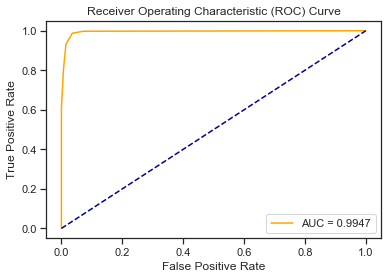

                 Confusion matrix
                 Predict No Defect    Predict Defect
Actual No Defect         1459                22
Actual Defect              27               368

Accuracy  0.974
 
           No Defect       Defect
Num case     1481           395
Precision   0.982         0.944
Recall      0.985         0.932
F1          0.983         0.938


In [99]:
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)
probabilities = classifier.predict_proba(X_test)
plot_roc_curve(probabilities,y_test)

print_metrics(y_test,y_pred)

<h3>Model 15: Multinomial Naive Bayes</h3>

In order to apply Multinomial Naive Bayes, we need to discretize the inputs.
So, we import KBinsDiscretizer, from sklearn.preprocessing.

We iterate over the range (4,20) to find an ideal bin_count that yields maximum Average 10-fold cross-validation accuracy.

For this dataset, n_bins=5 yields the maximum Average 10-fold cross-validation accuracy.
Hence, we set n_bins=5 for KBinsDiscretizer.

In [100]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.naive_bayes import MultinomialNB

est = KBinsDiscretizer(n_bins=5,encode='onehot',strategy='uniform')
est.fit(X_train)
Xd_train = est.transform(X_train)
Xd_test  = est.transform(X_test)

classifier = MultinomialNB() #alpha, default value=1.0

scores = cross_validate(classifier, Xd_train, y_train, scoring=scoring, cv=10)
print("Average 10-fold Accuracy: ", scores['test_score'].mean())

Average 10-fold Accuracy:  0.9926705725699069


In [101]:
classifier.fit(Xd_train,y_train)

y_pred = classifier.predict(Xd_test)

print_metrics(y_test,y_pred)

                 Confusion matrix
                 Predict No Defect    Predict Defect
Actual No Defect         1470                11
Actual Defect               0               395

Accuracy  0.994
 
           No Defect       Defect
Num case     1481           395
Precision   1.000         0.973
Recall      0.993         1.000
F1          0.996         0.986


### Conclusion on training the dataset with id field & standard scaling:

Ranking of our top 3 models based on Accuracy on the 20% test data: 
1. RandomForest
2. AdaBoost, Deep Neural Network
3. 1 layer NN, SVC-Linear

Ranking of our top 3 models based on False Negative on the 20% test data: 
1. RandomForest, AdaBoost, Deep NN
2. 1 NN
3. SVC-Linear

Ranking of our top 3 models based on False Positive on the 20% test data: 
1. RandomForest
2. AdaBoost, Deep NN
3. Logistic Regression, SVC - Linear

Ranking of our top 3 models based on AUC on the 20% test data: 
1. RandomForest
2. AdaBoost, Deep NN
3. 1 NN

### Conclusion on comparison between training with id and without id:

1. Id has a major impact on the accuracy and confusion matrix during training and testing.
2. As seen from the plotting of id vs category we see a clear pattern of the dependency which is not at all present for other features.
3. Also logically, id column is not a very good feature for training the models as it represents the software id which is unique for each record and may change for some other dataset but with similar problem statement. It might also not be of any use if instead of numerical id, the names of the software were provided which would have made it unique but categorical data.
4. The usefulness of the id column is only if the next set of test data is from same set of software ids as the training dataset but, if it is from outside then the model cannot be expected to perform well if trained using id field.

<h1> Actual predictive modelling of test data</h1>

Shortlisting our top 2 models to predict on 'test.csv'

With id :
1. RandomForest
2. Neural Network

Without id:
1. AdaBoost
2. SVC-rbf

In [102]:
#df_test = pd.read_csv("test.csv")
df_test = pd.read_csv("test.csv")
df_test.head(5)

,Id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
0,10490,4.0,1.0,1.0,1.0,10.0,31.70,0.40,2.50,12.68,...,4.40,2.0,0.0,0.0,0.0,5.0,4.0,6.0,4.0,1.0
1,7211,144.0,13.0,4.0,11.0,568.0,3445.54,0.02,61.01,56.47,...,11678.83,91.0,26.0,18.0,6.0,25.0,42.0,363.0,205.0,25.0
2,7109,7.0,2.0,1.0,2.0,13.0,43.19,0.27,3.75,11.52,...,9.00,5.0,0.0,0.0,0.0,6.0,4.0,8.0,5.0,3.0
3,5567,31.0,10.0,1.0,2.0,115.0,599.09,0.05,19.98,29.99,...,664.82,22.0,3.0,3.0,1.0,17.0,20.0,68.0,47.0,19.0
4,6677,4.0,1.0,1.0,1.0,5.0,11.61,0.67,1.50,7.74,...,0.97,2.0,0.0,0.0,0.0,3.0,2.0,3.0,2.0,1.0


#### With the id

In [103]:
X_actual = df_test.iloc[:,:].values

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_actual = sc.fit_transform(X_actual)

In [ ]:
X_actual

In [104]:
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(X_with_id_scaled,y)
y_pred = classifier.predict(X_actual)
id_person = df_test.iloc[:,0].values
Prediction = pd.DataFrame()
Prediction.insert(0, 'Id', id_person.astype(int))
Prediction.insert(1, 'Category', y_pred.astype(int))
Prediction.to_csv("Prediction_RF_id.csv", index=False)
Prediction

,Id,Category
0,10490,0
1,7211,0
2,7109,0
3,5567,0
4,6677,0
...,...,...
1495,8407,0
1496,186,1
1497,1761,1
1498,3776,0


In [105]:
classifier = MLPClassifier(hidden_layer_sizes=(10,7,5), max_iter=3000,activation="logistic",solver="lbfgs")
classifier.fit(X_with_id_scaled,y)
y_pred = classifier.predict(X_actual)
id_person = df_test.iloc[:,0].values
Prediction = pd.DataFrame()
Prediction.insert(0, 'Id', id_person.astype(int))
Prediction.insert(1, 'Category', y_pred.astype(int))
Prediction.to_csv("Prediction_NN_id.csv", index=False)
Prediction

,Id,Category
0,10490,0
1,7211,0
2,7109,0
3,5567,0
4,6677,0
...,...,...
1495,8407,0
1496,186,1
1497,1761,1
1498,3776,0


#### Without the id

In [106]:
X_actual = df_test.iloc[:,1:].values

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_actual = sc.fit_transform(X_actual)

In [107]:
classifier = AdaBoostClassifier(n_estimators=100)
classifier.fit(X_without_id_scaled,y)
y_pred = classifier.predict(X_actual)
id_person = df_test.iloc[:,0].values
Prediction = pd.DataFrame()
Prediction.insert(0, 'Id', id_person.astype(int))
Prediction.insert(1, 'Category', y_pred.astype(int))
Prediction.to_csv("Prediction_Ada_noid.csv", index=False)
Prediction

,Id,Category
0,10490,0
1,7211,0
2,7109,0
3,5567,0
4,6677,0
...,...,...
1495,8407,0
1496,186,0
1497,1761,0
1498,3776,0


In [108]:
classifier =  svm.SVC(kernel='rbf', gamma='auto')
classifier.fit(X_without_id_scaled,y)
y_pred = classifier.predict(X_actual)
id_person = df_test.iloc[:,0].values
Prediction = pd.DataFrame()
Prediction.insert(0, 'Id', id_person.astype(int))
Prediction.insert(1, 'Category', y_pred.astype(int))
Prediction.to_csv("Prediction_SVCrbf_noid.csv", index=False)
Prediction

,Id,Category
0,10490,0
1,7211,0
2,7109,0
3,5567,0
4,6677,0
...,...,...
1495,8407,0
1496,186,0
1497,1761,0
1498,3776,0
